<h1 style="text-align: center;">Code - RDD Analaysis for Tripadvisor Bubble Rating</h1>

Source: https://www.kaggle.com/datasets/jocelyndumlao/tripadvisor-rating-impact-on-hotel-popularity

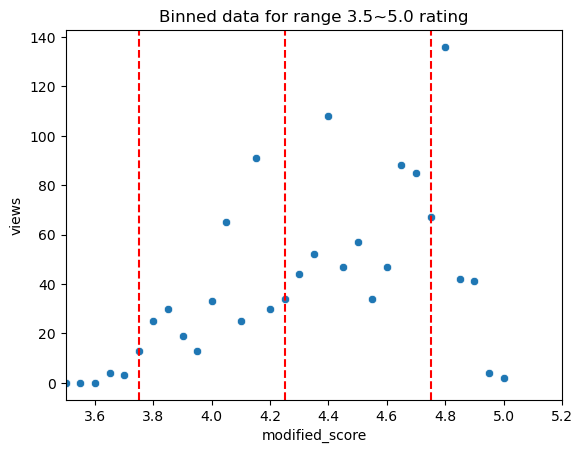

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


trip_ad_df = pd.read_csv("data_rdd.csv", encoding="latin1")


def round_to_nearest_0_05(x):
    return round(x / 0.05) * 0.05


trip_ad_df_temp = trip_ad_df.copy()

trip_ad_df_temp["modified_score"] = trip_ad_df_temp["score_adjusted"].apply(
    round_to_nearest_0_05
)

temp = trip_ad_df_temp.groupby("modified_score", as_index=False)["views"].sum()

temp.head()

import matplotlib.pyplot as plt
import seaborn as sns

# Set X range of scatterplot from 3.5

sns.scatterplot(x="modified_score", y="views", data=temp)
plt.xlim(3.5, None)
plt.title("Binned data for range 3.5~5.0 rating")

# Virtival lines at 3.75, 4.25, 4.75
plt.axvline(x=3.75, color="red", linestyle="--")
plt.axvline(x=4.25, color="red", linestyle="--")
plt.axvline(x=4.75, color="red", linestyle="--")

plt.show()

In [2]:
trip_ad_df_temp.groupby("modified_score").size()

modified_score
1.00     65
1.25      2
1.35      6
1.40      1
1.45      3
       ... 
4.80    147
4.85    112
4.90    119
4.95     99
5.00    342
Length: 74, dtype: int64

In [3]:
trip_ad_df = pd.read_csv("data_rdd.csv", encoding="latin1")


trip_ad_df_temp = trip_ad_df.copy()
trip_ad_df_temp["modified_score"] = trip_ad_df_temp["score_adjusted"].apply(
    round_to_nearest_0_05
)

temp = trip_ad_df_temp.groupby("modified_score", as_index=False)["views"].sum()

temp_rdd = temp[temp["modified_score"].between(3.25, 4.24)].copy()

# Define treatment and centered score
temp_rdd["treatment"] = (temp_rdd["modified_score"] >= 3.75).astype(int)
temp_rdd["score_centered"] = temp_rdd["modified_score"] - 3.75

# Run RDD regression on aggregated views
rdd_agg_model = smf.ols(
    "views ~ treatment + score_centered + treatment:score_centered", data=temp_rdd
).fit()

# Split for line fitting
below = temp_rdd[temp_rdd["modified_score"] < 3.75]
above = temp_rdd[temp_rdd["modified_score"] >= 3.75]

fit_below = smf.ols("views ~ modified_score", data=below).fit()
fit_above = smf.ols("views ~ modified_score", data=above).fit()

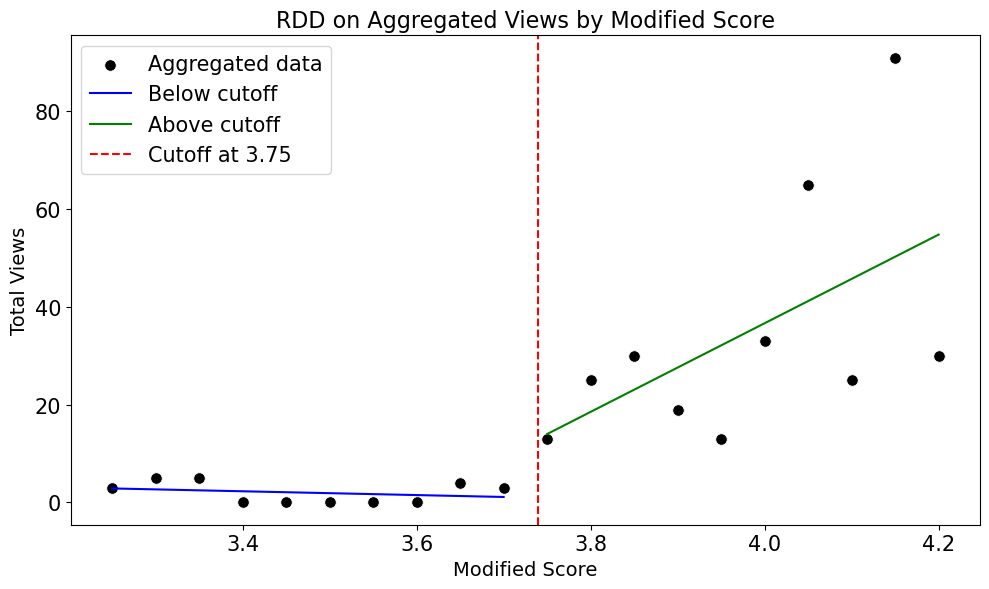

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="modified_score",
    y="views",
    data=temp_rdd,
    color="black",
    s=70,
    label="Aggregated data",
)

# Regression lines
plt.plot(
    below["modified_score"],
    fit_below.predict(below),
    color="blue",
    label="Below cutoff",
)
plt.plot(
    above["modified_score"],
    fit_above.predict(above),
    color="green",
    label="Above cutoff",
)

# Cutoff line
plt.axvline(3.74, color="red", linestyle="--", label="Cutoff at 3.75")

# Axes and title with larger font sizes
plt.xlabel("Modified Score", fontsize=14)
plt.ylabel("Total Views", fontsize=14)
plt.title("RDD on Aggregated Views by Modified Score", fontsize=16)

# Legend font size
plt.legend(fontsize=15)

# Tick font size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()

In [5]:
temp_rdd_rev = temp[temp["modified_score"].between(3.75, 4.74)].copy()

cutoff = 4.25
temp_rdd_rev["treatment"] = (temp_rdd_rev["modified_score"] >= cutoff).astype(int)
temp_rdd_rev["score_centered"] = temp_rdd_rev["modified_score"] - cutoff

# Run RDD regression
rdd_rev_model = smf.ols(
    "views ~ treatment + score_centered + treatment:score_centered", data=temp_rdd_rev
).fit()

# Fit lines below and above cutoff
below = temp_rdd_rev[temp_rdd_rev["modified_score"] < cutoff]
above = temp_rdd_rev[temp_rdd_rev["modified_score"] >= cutoff]

fit_below = smf.ols("views ~ modified_score", data=below).fit()
fit_above = smf.ols("views ~ modified_score", data=above).fit()

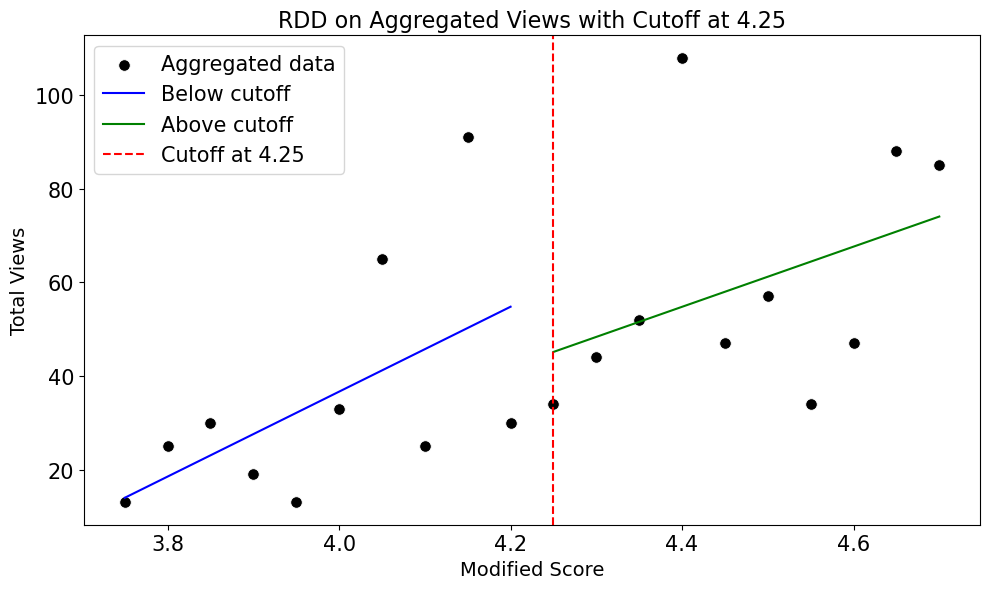

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.397
Model:                            OLS   Adj. R-squared:                  0.284
Method:                 Least Squares   F-statistic:                     3.510
Date:                Tue, 03 Jun 2025   Prob (F-statistic):             0.0397
Time:                        22:27:39   Log-Likelihood:                -89.125
No. Observations:                  20   AIC:                             186.3
Df Residuals:                      16   BIC:                             190.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   59.3333     15.924      3.726      0.002      25.576      93.091
treatment                  -14.1879     21.007     -0.675      0.509     -58.721      30.345
score_centered              90.6667     51.328      1.766      0.096     -18.144     199.478
treatment:score_centered   -26.4242     72.589     -0.364      0.721    -180.306     127.458
==============================================================================
Omnibus:                        4.855   Durbin-Watson:                   2.406
Prob(Omnibus):                  0.088   Jarque-Bera (JB):                2.988
Skew:                           0.922   Prob(JB):                        0.224
Kurtosis:                       3.432   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="modified_score",
    y="views",
    data=temp_rdd_rev,
    color="black",
    s=70,
    label="Aggregated data",
)

# Regression lines
plt.plot(
    below["modified_score"],
    fit_below.predict(below),
    color="blue",
    label="Below cutoff",
)
plt.plot(
    above["modified_score"],
    fit_above.predict(above),
    color="green",
    label="Above cutoff",
)

# Cutoff line
plt.axvline(cutoff, color="red", linestyle="--", label=f"Cutoff at {cutoff}")

# Axes and title with larger font sizes
plt.xlabel("Modified Score", fontsize=14)
plt.ylabel("Total Views", fontsize=14)
plt.title(f"RDD on Aggregated Views with Cutoff at {cutoff}", fontsize=16)

# Legend font size
plt.legend(fontsize=15)

# Tick label font size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()

# Show model summary
rdd_rev_model.summary()

In [7]:
temp_rdd_upper = temp[temp["modified_score"].between(4.25, 5.00)].copy()

# Define treatment at cutoff = 4.75
cutoff = 4.75
temp_rdd_upper["treatment"] = (temp_rdd_upper["modified_score"] >= cutoff).astype(int)
temp_rdd_upper["score_centered"] = temp_rdd_upper["modified_score"] - cutoff

# Run RDD regression
rdd_upper_model = smf.ols(
    "views ~ treatment + score_centered + treatment:score_centered", data=temp_rdd_upper
).fit()

# Fit regression lines below and above the cutoff
below = temp_rdd_upper[temp_rdd_upper["modified_score"] < cutoff]
above = temp_rdd_upper[temp_rdd_upper["modified_score"] >= cutoff]

fit_below = smf.ols("views ~ modified_score", data=below).fit()
fit_above = smf.ols("views ~ modified_score", data=above).fit()

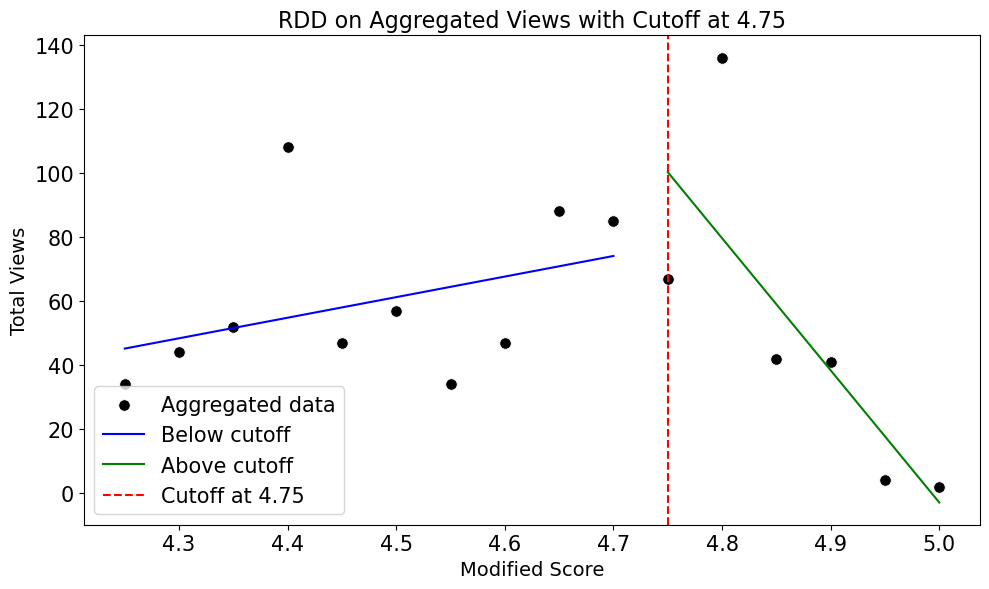

/opt/anaconda3/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     3.617
Date:                Tue, 03 Jun 2025   Prob (F-statistic):             0.0455
Time:                        22:27:39   Log-Likelihood:                -73.938
No. Observations:                  16   AIC:                             155.9
Df Residuals:                      12   BIC:                             159.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   77.2667     19.394      3.984      0.002      35.011     119.522
treatment                   22.9714     28.254      0.813      0.432     -38.589      84.532
score_centered              64.2424     62.512      1.028      0.324     -71.959     200.444
treatment:score_centered  -476.8139    149.432     -3.191      0.008    -802.398    -151.230
==============================================================================
Omnibus:                        5.611   Durbin-Watson:                   2.651
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                3.196
Skew:                           1.062   Prob(JB):                        0.202
Kurtosis:                       3.531   Cond. No.                         23.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(
    x="modified_score",
    y="views",
    data=temp_rdd_upper,
    color="black",
    s=70,
    label="Aggregated data",
)

# Regression lines
plt.plot(
    below["modified_score"],
    fit_below.predict(below),
    color="blue",
    label="Below cutoff",
)
plt.plot(
    above["modified_score"],
    fit_above.predict(above),
    color="green",
    label="Above cutoff",
)

# Cutoff line
plt.axvline(cutoff, color="red", linestyle="--", label=f"Cutoff at {cutoff}")

# Axes and title with larger font sizes
plt.xlabel("Modified Score", fontsize=14)
plt.ylabel("Total Views", fontsize=14)
plt.title(f"RDD on Aggregated Views with Cutoff at {cutoff}", fontsize=16)

# Legend font size
plt.legend(fontsize=15)

# Tick label font sizes
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()

# Show model summary
rdd_upper_model.summary()

In [9]:
trip_df = pd.read_csv("Data_rdd.csv", encoding="latin1")


avg_reviews_by_bubble = trip_df.groupby("bubble_rating", as_index=False)[
    "n_reviews"
].mean()
avg_reviews_by_bubble

,bubble_rating,n_reviews
0,1.0,1.676923
1,1.5,17.263158
2,2.0,43.876190
3,2.5,79.662722
4,3.0,72.862179
5,3.5,175.165428
6,4.0,249.074597
7,4.5,213.449216
8,5.0,105.972618


In [10]:
trip_df = pd.read_csv("Data_rdd.csv", encoding="latin1")


avg_reviews_by_bubble = trip_df.groupby("bubble_rating", as_index=False)[
    "price_min"
].mean()
avg_reviews_by_bubble

,bubble_rating,price_min
0,1.0,4237.843750
1,1.5,3799.562500
2,2.0,3808.018182
3,2.5,3906.938144
4,3.0,3975.285714
5,3.5,4128.571429
6,4.0,4803.868456
7,4.5,5459.342466
8,5.0,5820.925035


# Further analysis

In [11]:
trip_ad_df.modified_score = trip_ad_df["modified_score"] = trip_ad_df[
    "score_adjusted"
].apply(round_to_nearest_0_05)

/var/folders/lk/b7zqk0ps4792145cxptl4zwc0000gn/T/ipykernel_6591/3065359599.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  trip_ad_df.modified_score = trip_ad_df["modified_score"] = trip_ad_df[


In [12]:
trip_ad_df_temp = trip_ad_df_temp[trip_ad_df["views"] > 0]
views = trip_ad_df_temp.groupby("modified_score", as_index=False)["views"].sum()
rating_count = trip_ad_df_temp.groupby("modified_score", as_index=False)[
    "n_reviews"
].mean()
price_min = trip_ad_df_temp.groupby("modified_score", as_index=False)[
    "price_min"
].mean()

price_max = trip_ad_df_temp.groupby("modified_score", as_index=False)[
    "price_max"
].mean()

In [13]:
df = pd.DataFrame(
    {
        "modified_score": views["modified_score"],
        "views": views["views"],
        "n_reviews": rating_count["n_reviews"],
        "price_min": price_min["price_min"],
        "price_max": price_max["price_max"],
    }
)

In [14]:
df.head()

,modified_score,views,n_reviews,price_min,price_max
0,2.15,3,845.0,1919.0,5886.0
1,3.05,2,625.0,3692.0,8212.0
2,3.15,6,893.0,2818.0,7300.0
3,3.25,3,372.0,3519.0,13947.0
4,3.30,5,909.0,3538.0,18134.0


### Hypothesis 1: Does impact of 'low rating count' negatively impact with 'high score'?

$$
Views = \beta_0 + \beta_1*Rating + \beta_2 * \text{n reviews} + \beta_3 * Ratings * \text{n reviews} + \epsilon
$$

In [15]:
model = smf.ols(
    "views ~ modified_score + n_reviews + n_reviews:modified_score",
    data=df,
).fit()

# Display model summary
# print(model.summary())
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  views   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     14.71
Date:                Tue, 03 Jun 2025   Prob (F-statistic):           4.52e-06
Time:                        22:27:40   Log-Likelihood:                -152.31
No. Observations:                  34   AIC:                             312.6
Df Residuals:                      30   BIC:                             318.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   67.1731     55.677      1.206      0.237     -46.534     180.880
modified_score             -12.4400     12.982     -0.958      0.346     -38.952      14.072
n_reviews                   -0.1644      0.056     -2.944      0.006      -0.278      -0.050
n_reviews:modified_score     0.0438      0.013      3.388      0.002       0.017       0.070
==============================================================================
Omnibus:                        7.148   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                5.596
Skew:                           0.840   Prob(JB):                       0.0609
Kurtosis:                       4.061   Cond. No.                     8.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

$$
\beta_3: \text{n reviews * modified score:      0.0438}
$$

Impact of rating is higher when n_reviews are higher. 
Which means, when n_reviews are lower, impact of rating on view decrease.
As we see below, number of rating decreases dramatically as rating goes above 4.7:

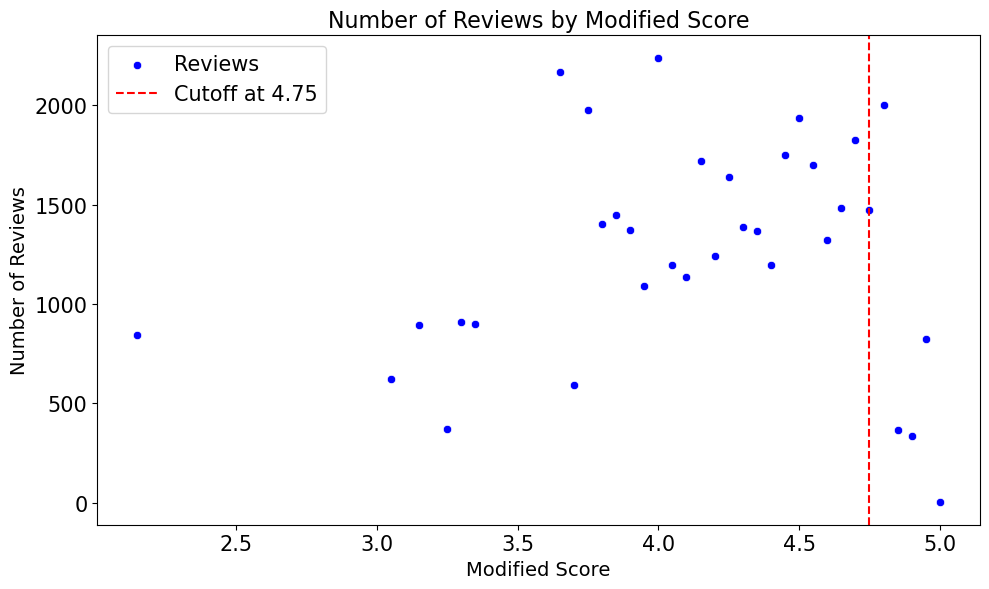

In [16]:
plt.figure(figsize=(10, 6))

# Scatter plot
sns.scatterplot(
    x="modified_score", y="n_reviews", data=df, color="blue", label="Reviews"
)

# Vertical cutoff line
plt.axvline(4.75, color="red", linestyle="--", label="Cutoff at 4.75")

# Axes and title with larger font sizes
plt.xlabel("Modified Score", fontsize=14)
plt.ylabel("Number of Reviews", fontsize=14)
plt.title("Number of Reviews by Modified Score", fontsize=16)

# Legend font size
plt.legend(fontsize=15)

# Tick label font sizes
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.tight_layout()
plt.show()